<a href="https://colab.research.google.com/github/vani83prasad/vani83prasad/blob/main/Global_Superstores_Customer_%26_Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# New section

In [26]:
path = kagglehub.dataset_download("fatihilhan/global-superstore-dataset")

csv_file_path = os.path.join(path, "superstore.csv")
print("Path to dataset files:", path)
print("Full path to CSV file:", csv_file_path)
df = pd.read_csv (csv_file_path)
data = pd.read_csv(csv_file_path)

# add /superstore.csv to your path
df = pd.read_csv(csv_file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/fatihilhan/global-superstore-dataset/versions/1
Full path to CSV file: /root/.cache/kagglehub/datasets/fatihilhan/global-superstore-dataset/versions/1/superstore.csv


# Global SuperStore Analysis (2011-2014)

This project involves an in-depth analysis of a global superstore's performance, covering key aspects such as product sales, customer behavior, and market growth.

### Key Highlights:
- **Product Categories**:
  - Analyzed sales trends and profitability across regions and categories.
  - Identified top-performing products and regional preferences.

- **Customer Insights**:
  - Explored customer segments and order patterns for better marketing strategies.

- **Order Trends**:
  - Studied peak ordering times and yearly sales/profit dynamics.

- **Market Growth**:
  - Assessed market share, growth percentages, and profitable regions.

This analysis provides actionable insights to improve strategies and drive success.


# Data Set Overview

In [27]:
df.head()


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,West,31468,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,31469,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,32440,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [29]:
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [49]:
# let's check out the columns which are suitable category column type

data.nunique()

,0
Category,3
City,3636
Country,147
Customer.ID,4873
Customer.Name,795
Discount,27
Market,7
记录数,1
Order.Date,1430
Order.ID,25035


In [51]:
# making sure neither of our category columns have leading spaces

def remove_leading_spaces(df):
    for cols in df.columns:
        if df[cols].dtypes in ['object','category']:
            df[cols] = df[cols].str.strip()
        return df


In [52]:
data = remove_leading_spaces(data)

In [53]:
data.head(2)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4


#Product Analyst task

# Introduction Objective:
To analyze product performance using the dataset and uncover actionable insights for profitability, product improvement, and market opportunities.

In [30]:
category_sales = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_sales.sort_values(by='Profit', ascending=False)

,Category,Sales,Profit
2,Technology,4744691,663778.73318
1,Office Supplies,3787330,518473.83430
0,Furniture,4110884,285204.72380


<Axes: xlabel='Category', ylabel='Profit'>

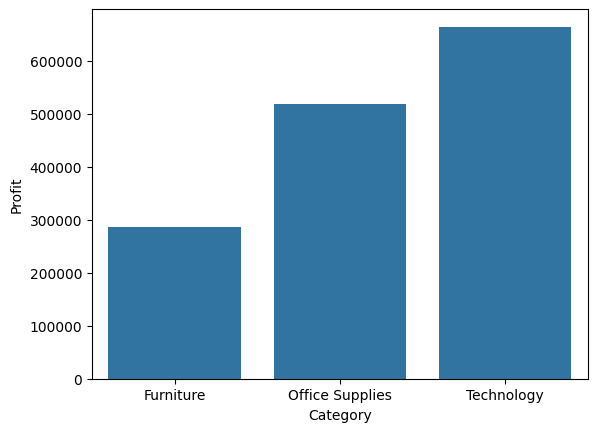

In [31]:
import seaborn as sns
sns.barplot(x='Category', y='Profit', data=category_sales)

# Low Profit Products

**Filter products with high sales but low profit**

In [32]:
# Define threshold and low_value
threshold = 100  # Replace with your desired sales threshold
low_value = 50   # Replace with your desired profit threshold

# Filter products with high sales but low profit, and limit to 20 rows
low_profit_products = df[(df['Sales'] > threshold) & (df['Profit'] < low_value)]
low_profit_products[['Product.ID', 'Product.Name', 'Sales', 'Profit']].head(20)


,Product.ID,Product.Name,Sales,Profit
93,OFF-PA-10002254,Xerox 1883,106,48.5392
122,OFF-AR-10001897,Model L Table or Wall-Mount Pencil Sharpener,108,30.2232
164,OFF-AR-10003373,"Boston School Pro Electric Pencil Sharpener, 1670",124,33.4584
185,OFF-AP-10000240,Belkin F9G930V10-GRY 9 Outlet Surge,107,31.0184
187,OFF-ST-10002574,"SAFCO Commercial Wire Shelving, Black",276,0.0000
188,OFF-ST-10003442,Eldon Portable Mobile Manager,141,38.1780
189,OFF-SU-10000646,Premier Automatic Letter Opener,481,14.4222
193,OFF-ST-10000991,Space Solutions HD Industrial Steel Shelving.,345,10.3473
201,OFF-ST-10002756,"Tennsco Stur-D-Stor Boltless Shelving, 5 Shelv...",947,9.4717
210,OFF-ST-10003692,Recycled Steel Personal File for Hanging File ...,114,28.6150


# Discount Impact Analysis

**Analyze the effect of discounts**

<Axes: xlabel='Discount', ylabel='Profit'>

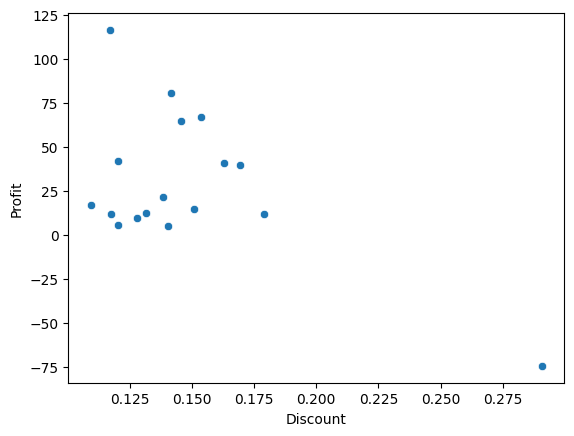

In [34]:
discount_impact = df.groupby('Sub.Category')[['Discount', 'Profit']].mean().reset_index()
sns.scatterplot(x='Discount', y='Profit', data=discount_impact)


<Axes: >

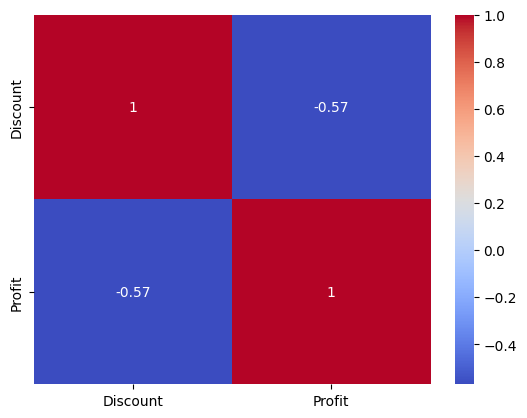

In [37]:
# Calculate correlation for numeric columns
correlation_matrix = discount_impact[['Discount', 'Profit']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


# Market Expansion Opportunities


**Identify lucrative markets:**

<Axes: xlabel='Region', ylabel='Profit'>

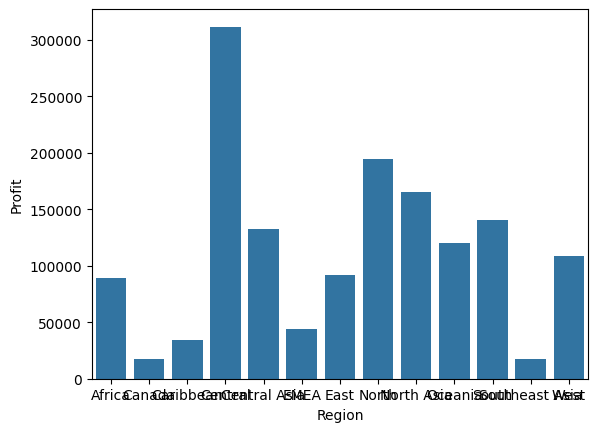

In [38]:
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
sns.barplot(x='Region', y='Profit', data=region_profit)


**Check profitable product categories in these regions:**

In [41]:
print(df['Region'].unique())




['West' 'East' 'South' 'Central' 'Africa' 'Central Asia' 'North Asia'
 'Caribbean' 'North' 'EMEA' 'Oceania' 'Southeast Asia' 'Canada']


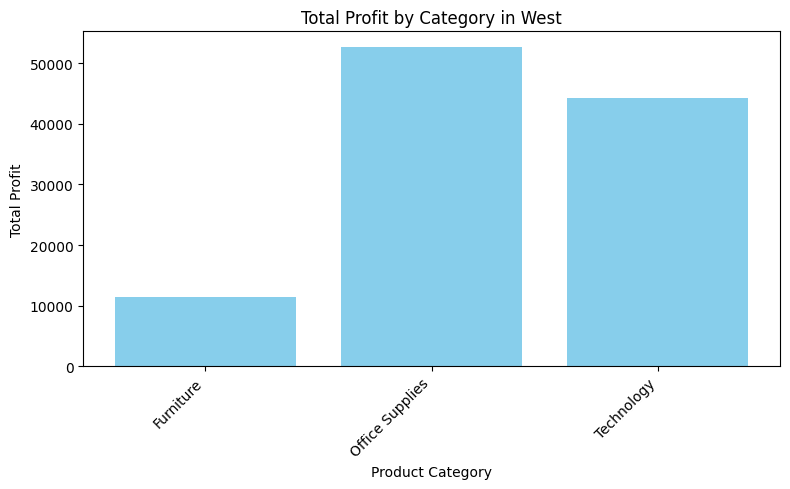

In [48]:
import matplotlib.pyplot as plt

# Filter for target region
target_region = 'West'  # Replace with the actual region you want to analyze
profitable_regions = df[df['Region'] == target_region].groupby('Category')['Profit'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 5))  # Adjust figure size

plt.bar(profitable_regions['Category'], profitable_regions['Profit'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title(f'Total Profit by Category in {target_region}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [69]:
top5_profit_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).head(5).reset_index()

# Style with gradient
styled_df = top5_profit_category.style.background_gradient(cmap='Spectral', subset=['Profit'])
styled_df



,Category,Profit
0,Technology,663778.733180
1,Office Supplies,518473.834300
2,Furniture,285204.723800


# Question 1. What are the top-performing Product.Categories and Sub.Categories by Profit and Sales?


# By Profit:

In [55]:
top_profit_categories = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).head(10)
top_profit_subcategories = df.groupby('Sub.Category')['Profit'].sum().sort_values(ascending=False).head(10)

# Print the results
print("Top 10 Categories by Profit:")
print(top_profit_categories)

print("\nTop 10 Sub-Categories by Profit:")
print(top_profit_subcategories)


Top 10 Categories by Profit:
Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64

Top 10 Sub-Categories by Profit:
Sub.Category
Copiers        258567.54818
Phones         216717.00580
Bookcases      161924.41950
Appliances     141680.58940
Chairs         140396.26750
Accessories    129626.30620
Storage        108461.48980
Binders         72449.84600
Paper           59207.68270
Machines        58867.87300
Name: Profit, dtype: float64


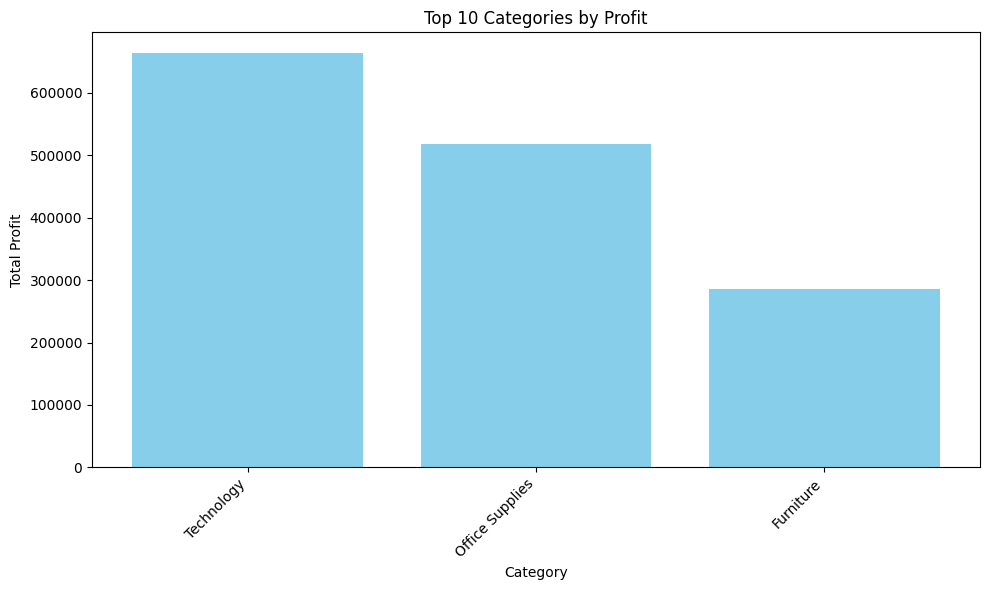

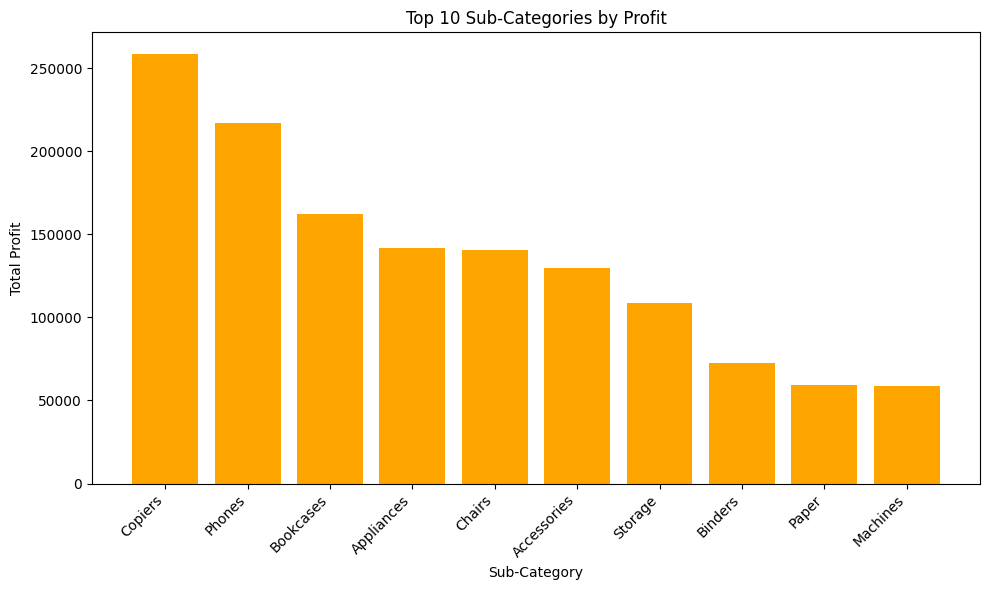

In [56]:
import matplotlib.pyplot as plt

# Top 10 Categories by Profit
top_profit_categories = df.groupby('Category')['Profit'].sum().sort_values(ascending=False).head(10)

# Plotting the bar graph for Categories
plt.figure(figsize=(10, 6))
plt.bar(top_profit_categories.index, top_profit_categories.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Top 10 Categories by Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 Sub-Categories by Profit
top_profit_subcategories = df.groupby('Sub.Category')['Profit'].sum().sort_values(ascending=False).head(10)

# Plotting the bar graph for Sub-Categories
plt.figure(figsize=(10, 6))
plt.bar(top_profit_subcategories.index, top_profit_subcategories.values, color='orange')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.title('Top 10 Sub-Categories by Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# By Sales:

In [57]:
top_sales_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_sales_subcategories = df.groupby('Sub.Category')['Sales'].sum().sort_values(ascending=False).head(10)


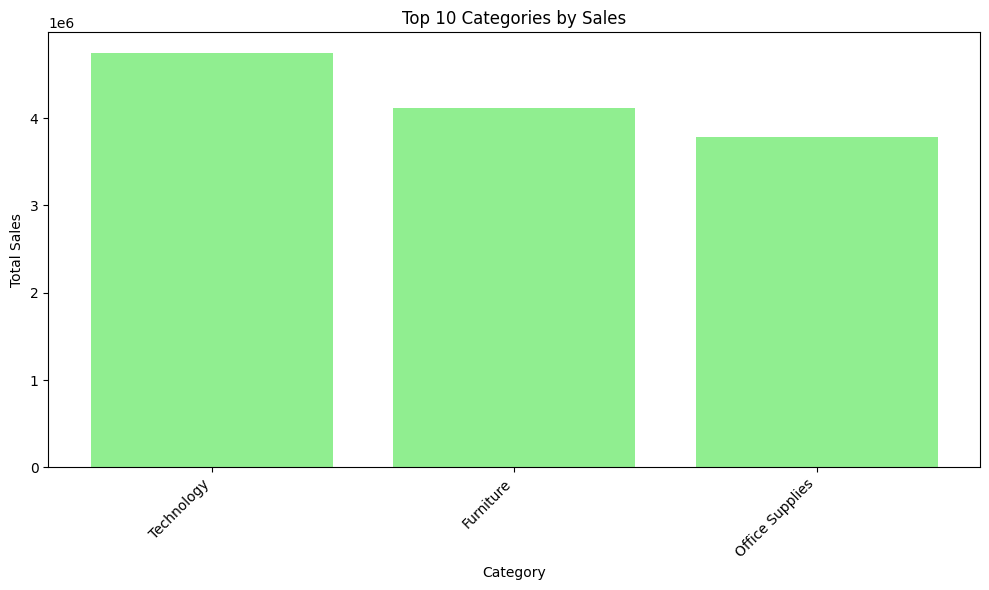

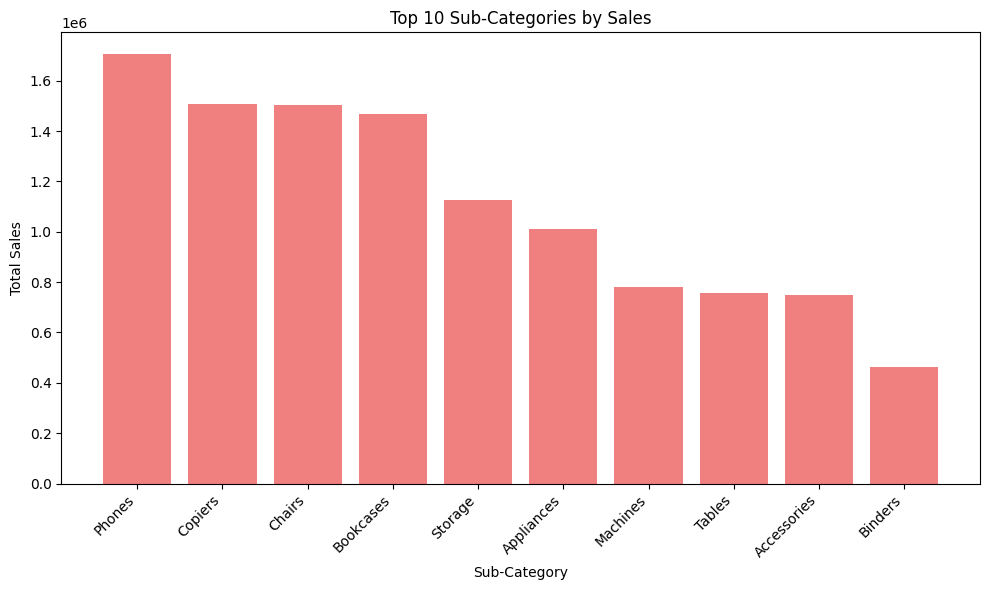

In [58]:
# Top 10 Categories by Sales
top_sales_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting the bar graph for Categories
plt.figure(figsize=(10, 6))
plt.bar(top_sales_categories.index, top_sales_categories.values, color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Top 10 Categories by Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 Sub-Categories by Sales
top_sales_subcategories = df.groupby('Sub.Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting the bar graph for Sub-Categories
plt.figure(figsize=(10, 6))
plt.bar(top_sales_subcategories.index, top_sales_subcategories.values, color='lightcoral')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Top 10 Sub-Categories by Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Question 2 Are there specific Products that sell in high quantities but generate low Profit?


In [62]:
# Calculate profit per product
profit_per_product = df.groupby('Product.Name').agg({'Profit': 'sum', 'Sales': 'sum'}).reset_index()

# Filter for high sales and low profit
high_sales_low_profit = profit_per_product[(profit_per_product['Sales'] > profit_per_product['Sales'].median()) &
                                            (profit_per_product['Profit'] < profit_per_product['Profit'].median())]

# Sort and select top 20 products
top_20_high_sales_low_profit = high_sales_low_profit.sort_values(by='Sales', ascending=False).head(20)

# Display results
print(top_20_high_sales_low_profit)


                                           Product.Name        Profit  Sales
2988                      Samsung Smart Phone, Cordless -1.980900e+02  48654
2414                     Motorola Smart Phone, Cordless -4.447038e+03  38935
1928                                Hoover Stove, White -2.180626e+03  32845
2847                               Rogers Lockers, Blue -2.893491e+03  28215
2904              SAFCO Executive Leather Armchair, Red -1.833173e+03  25639
3179                      Smead File Cart, Single Width -2.376692e+02  25397
2902       SAFCO Executive Leather Armchair, Adjustable -8.621816e+02  24216
976   Cisco TelePresence System EX90 Videoconferenci... -1.811078e+03  22638
2013                      Ikea Library with Doors, Pine -2.779512e+02  22538
1643       HON 5400 Series Task Chairs for Big and Tall  5.684342e-14  21870
2934                       Safco Classic Bookcase, Pine -1.273490e+03  21802
1839                Hon Executive Leather Armchair, Red -3.929284e+02  19803

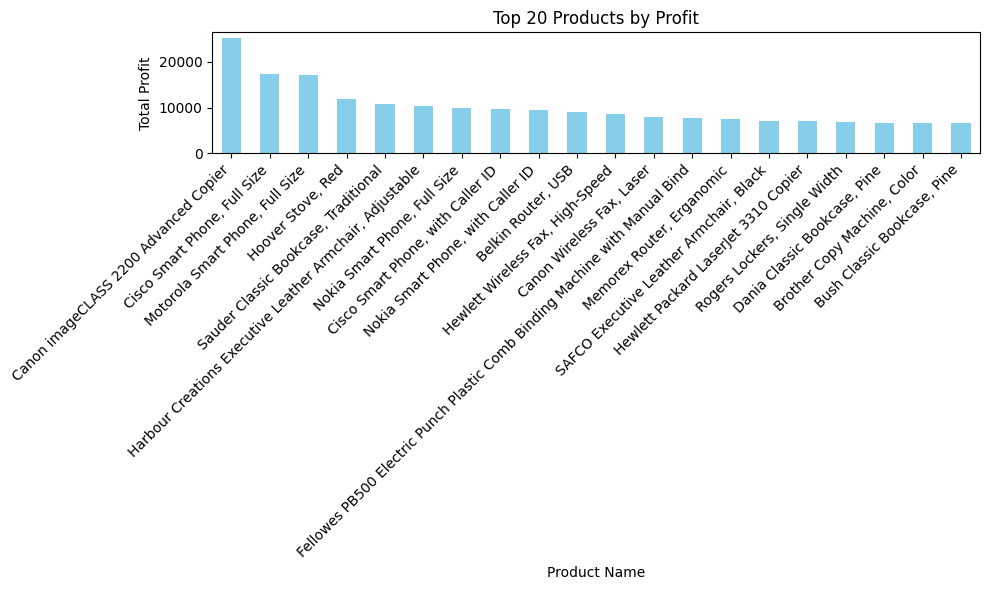

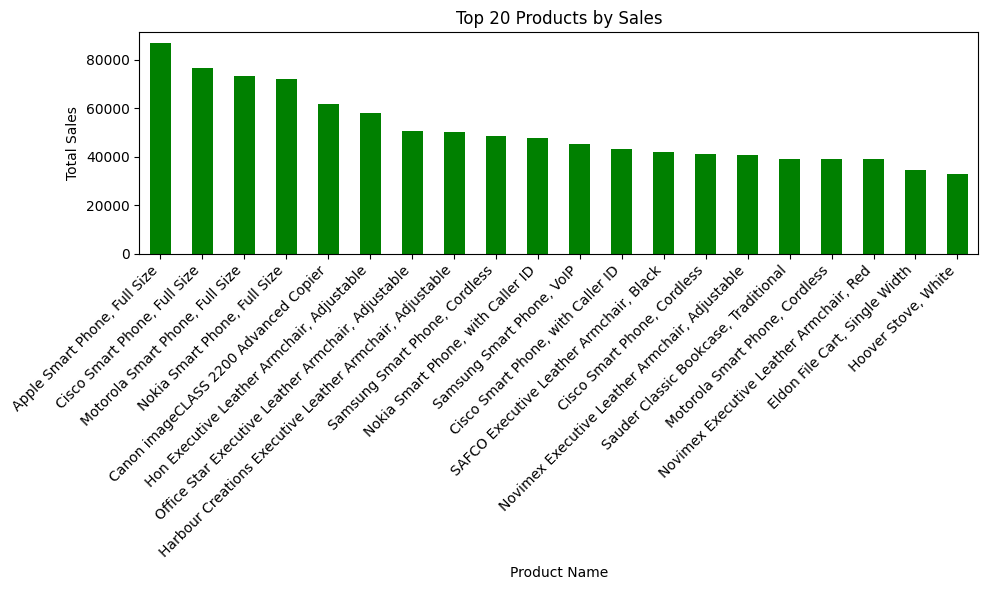

In [64]:
import matplotlib.pyplot as plt

# Top 20 by Profit
top_profit_products = df.groupby('Product.Name')['Profit'].sum().sort_values(ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_profit_products.plot(kind='bar', color='skyblue')
plt.title('Top 20 Products by Profit')
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 20 by Sales
top_sales_products = df.groupby('Product.Name')['Sales'].sum().sort_values(ascending=False).head(20)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_sales_products.plot(kind='bar', color='green')
plt.title('Top 20 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Question 3. How do Discount rates impact the profitability of specific Sub.Categories?


**Scatter Plot: Visualize the relationship between Discount and Profit for each Sub.Category.**


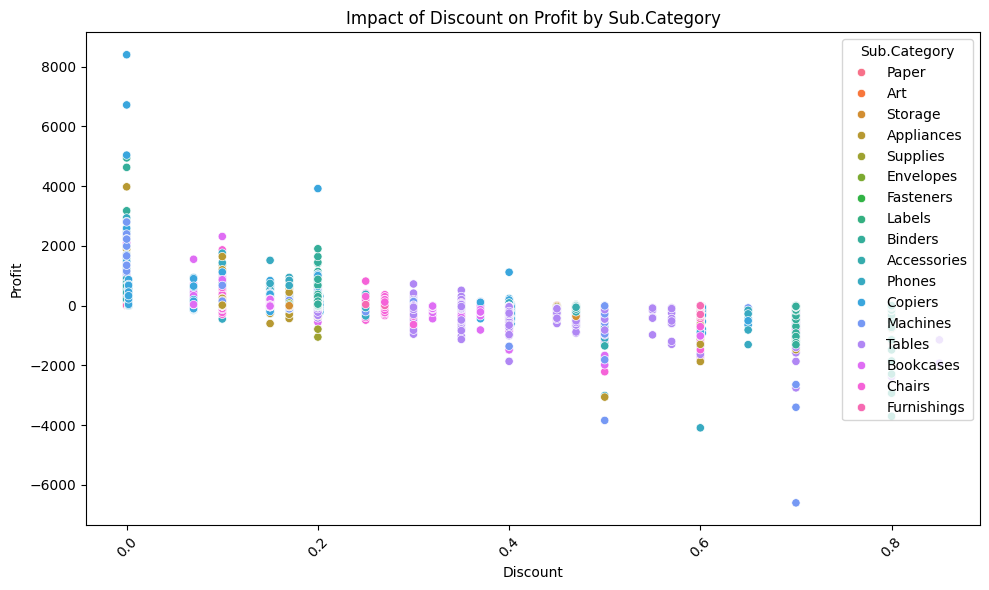

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to show impact of Discount on Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Sub.Category')
plt.title('Impact of Discount on Profit by Sub.Category')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Question 4. Which Markets are most lucrative for expanding specific Product.Categories?



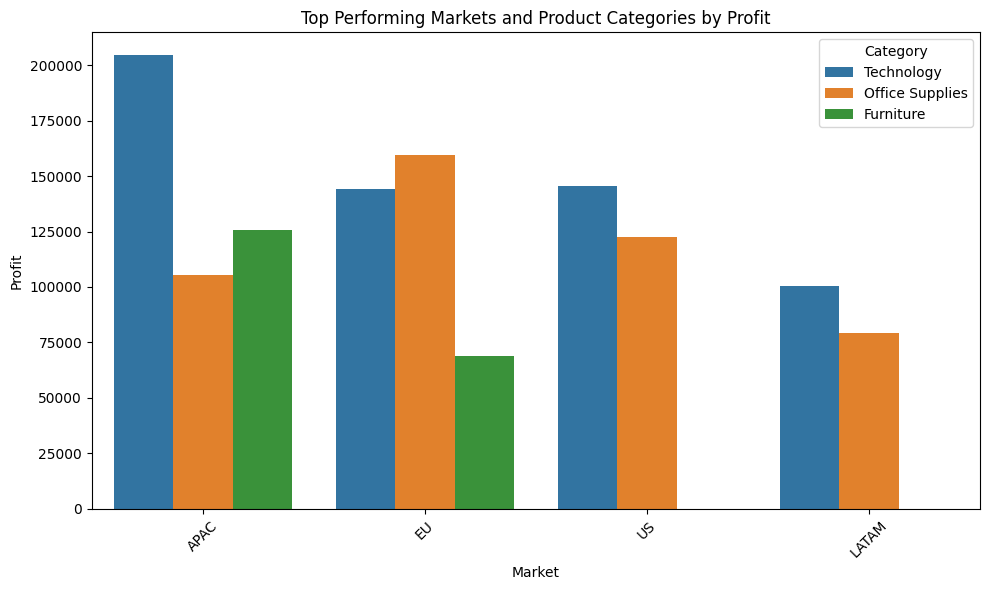

In [67]:
# Grouping by Market and Category to get total Sales and Profit
market_category_profit = df.groupby(['Market', 'Category'])[['Sales', 'Profit']].sum().reset_index()

# Sorting to identify the top performing combinations
top_market_category = market_category_profit.sort_values(by='Profit', ascending=False).head(10)

# Plotting a bar chart to visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=top_market_category, x='Market', y='Profit', hue='Category')
plt.title('Top Performing Markets and Product Categories by Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Top Categories/Subcategories**

**Technology (Phones)**: High profits and sales indicate significant demand and pricing power. Phones should remain a priority in marketing and inventory strategies to maintain leadership in this category.

**Furniture (Chairs):** Moderate profitability with potential for growth if pricing and promotions align with consumer trends.
Discount Impact

Subcategories like Furnishings experience reduced profitability due to deep discounts. Focus discounts on products with steady demand or bundle offers to maintain margins.

**High-Sales, Low-Profit Items**

**Office Supplies (Binders):** High volume but limited profitability may suggest reevaluating manufacturing costs, logistics, or pricing strategies. These products can act as "loss leaders."

**Market Insights**

**North America:** Dominates Furniture sales due to consumer preferences and stable supply chains. Focus expansion on allied categories like Decor.

**Asia-Pacific:** Electronics show growth potential, highlighting untapped demand. Marketing should leverage digital platforms and local influencers.


#  Recommendations


Cross-Sell Opportunities

Leverage Phones to promote accessories like Phone Cases and Headsets, bundling them in promotions for higher basket values. For Office Supplies (Binders), bundle with related items like Pens or Paper to increase sales.
Customer Segmentation

Use sales data to identify high-value customers buying Technology or Furniture. Tailor loyalty perks, like discounts on Laptops for repeat buyers or early access to Chairs.
Data-Driven Pricing

Analyze discount elasticity for Furnishings. Limit heavy discounts and test moderate reductions on products like Sofas to balance demand and margins.
Sustainability Strategies

Highlight eco-friendly options like Recycled Paper in Office Supplies or sustainable Desks. Align branding with green initiatives to attract environmentally conscious customers.


Further Recommendations with Additional Specifics
Cross-Sell Opportunities

Promote Phones alongside Smartwatches and Wireless Earbuds, creating tech bundles. Pair Chairs with Desks in Furniture for office setups. Highlight seasonal needs, like offering Printers with Printer Ink during back-to-school promotions.
Customer Segmentation

Identify frequent buyers of Monitors and offer targeted discounts on Keyboards. Use geographic data, e.g., targeting North America for Tables or Asia-Pacific for Tablets, based on market strength.
Data-Driven Pricing

Run dynamic pricing tests for Furnishings (Bookshelves) to find optimal price points without harming profitability. Retest for items like Binders where costs may be inefficient.
Sustainability Strategies

Launch campaigns for eco-friendly Reusable Notebooks or Solar-Powered Chargers. Market Bamboo Furniture for environmentally aware buyers, emphasizing green benefits in packaging and communication.














Bar Charts: Top Categories/Subcategories
Create a bar chart for top-performing product categories and subcategories in terms of profit and sales.

<ipython-input-71-33e5911e4b6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Category', data=top_categories.sort_values('Profit', ascending=False), palette='coolwarm')


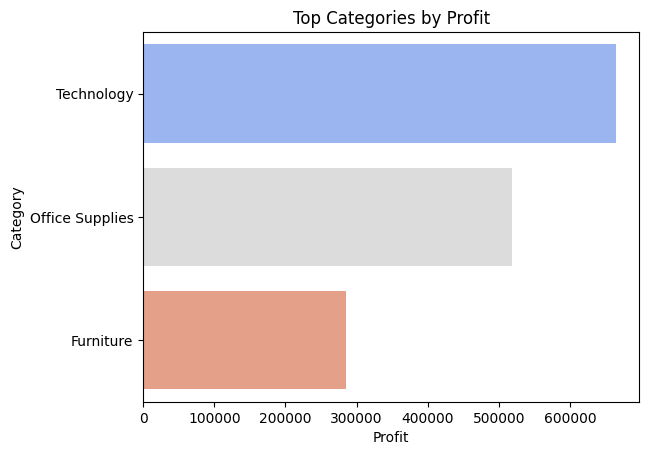

In [71]:
top_categories = df.groupby('Category')[['Profit', 'Sales']].sum().reset_index()
sns.barplot(x='Profit', y='Category', data=top_categories.sort_values('Profit', ascending=False), palette='coolwarm')
plt.title('Top Categories by Profit')
plt.show()


Box Plots: Discounts Impacting Profitability
Show variations in profitability across subcategories as influenced by discount rates.


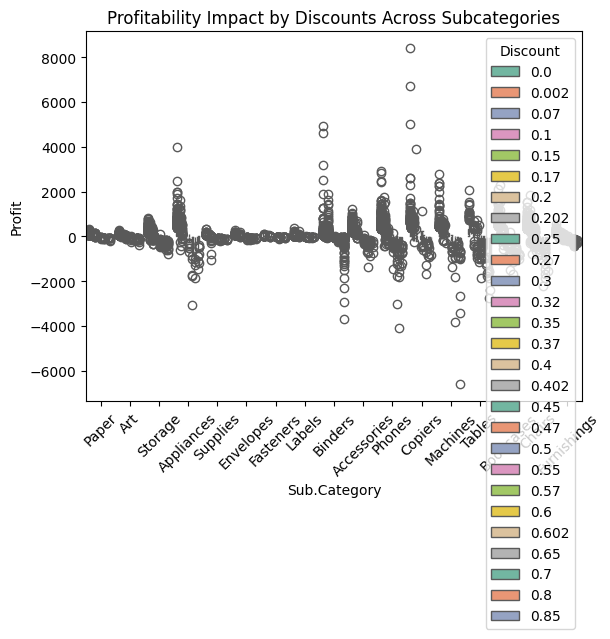

In [72]:
sns.boxplot(x='Sub.Category', y='Profit', data=df, hue='Discount', palette='Set2')
plt.title('Profitability Impact by Discounts Across Subcategories')
plt.xticks(rotation=45)
plt.show()


Heatmaps: High-Sales, Low-Profit Items
Highlight items with high sales but low profit using a heatmap.


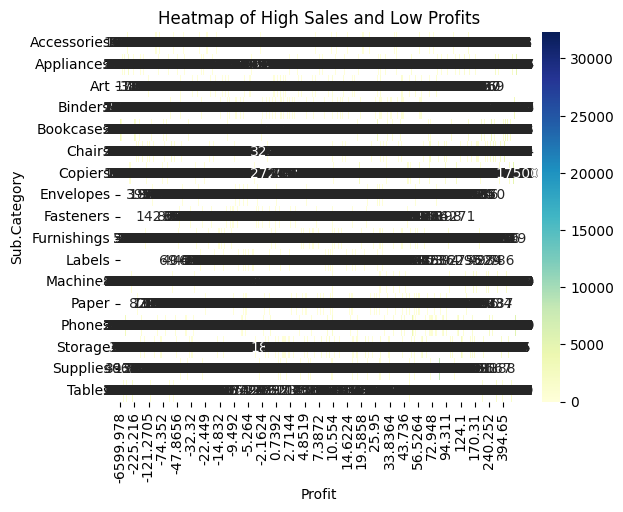

In [73]:
pivot_table = df.pivot_table(values='Sales', index='Sub.Category', columns='Profit', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of High Sales and Low Profits')
plt.show()


Geographic Maps: Market Insights
Use geographical maps to identify regions excelling in specific categories.

<ipython-input-75-4d7a6cf1d7fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Region', data=region_data.sort_values('Profit', ascending=False), palette='viridis')


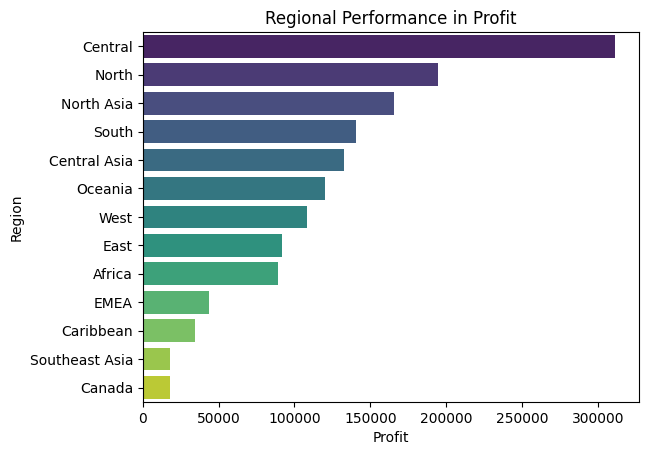

In [75]:
region_data = df.groupby('Region')[['Profit', 'Sales']].sum().reset_index()
sns.barplot(x='Profit', y='Region', data=region_data.sort_values('Profit', ascending=False), palette='viridis')
plt.title('Regional Performance in Profit')
plt.show()


 Scatter Plots: Discounts vs. Profitability
Use scatter plots to depict relationships between discount rates and profitability.

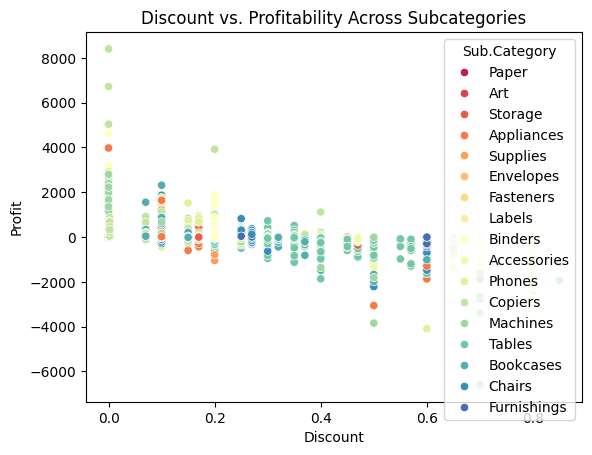

In [76]:
sns.scatterplot(x='Discount', y='Profit', hue='Sub.Category', data=df, palette='Spectral')
plt.title('Discount vs. Profitability Across Subcategories')
plt.show()

